In [1]:
!pip install prophet


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from datetime import timedelta

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VIX_Cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']
df = df.sort_values(by='ds')

#Prophet 65 10 25

In [4]:
n = len(df)
train_size = int(n * 0.65)
val_size = int(n * 0.25)
test_size = n - train_size - val_size
train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

In [5]:
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp520jzc22/hf9ot5gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp520jzc22/5qn5vw15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96611', 'data', 'file=/tmp/tmp520jzc22/hf9ot5gh.json', 'init=/tmp/tmp520jzc22/5qn5vw15.json', 'output', 'file=/tmp/tmp520jzc22/prophet_modelkn_yz6uq/prophet_model-20250611093357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:33:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:33:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
future_test = model.make_future_dataframe(periods=len(val_df) + len(test_df), freq='B')
forecast = model.predict(future_test)

# Trích phần tương ứng với tập test
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_df):].reset_index(drop=True)
test_true = test_df.reset_index(drop=True)

In [7]:
# Tính các chỉ số đánh giá
mae = mean_absolute_error(test_true['y'], forecast_test['yhat'])
mse = mean_squared_error(test_true['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_true['y'] - forecast_test['yhat']) / test_true['y'])) * 100
r2 = r2_score(test_true['y'], forecast_test['yhat'])

# In kết quả
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²:   {r2:.4f}")

MAE:  27669.62
MSE:  767709461.49
RMSE: 27707.57
MAPE: 251.47%
R²:   -545.8431


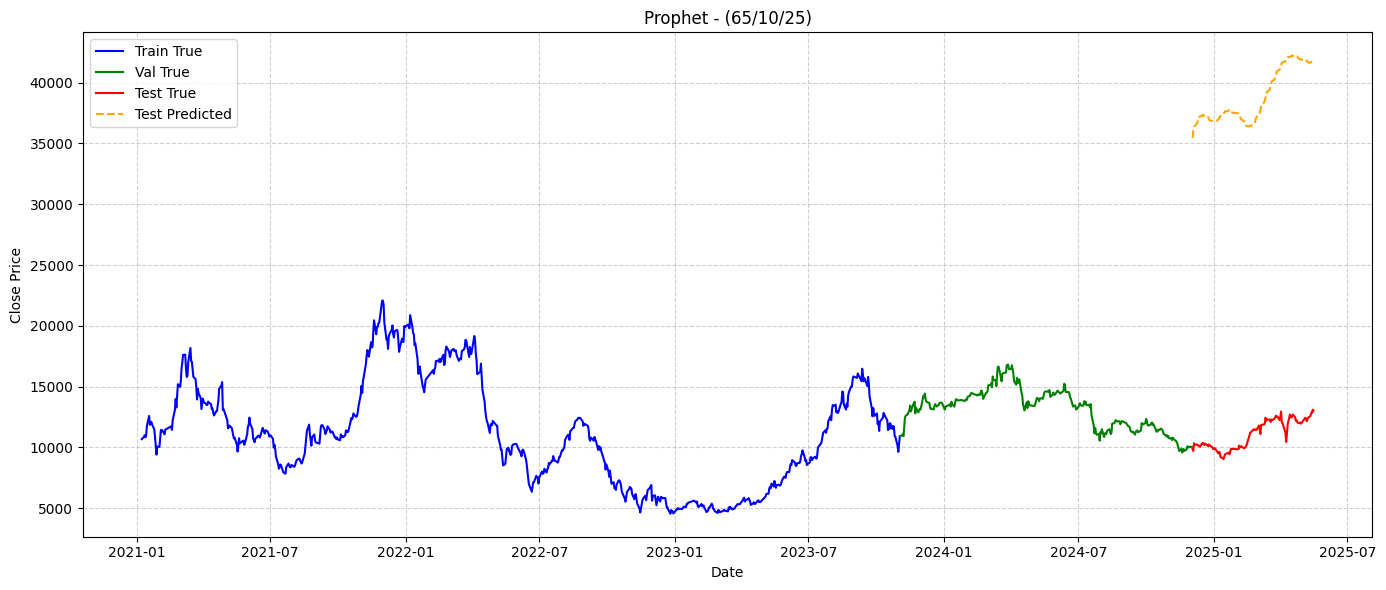

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train_df['ds'], train_df['y'], label='Train True', color='blue')
plt.plot(val_df['ds'], val_df['y'], label='Val True', color='green')
plt.plot(test_df['ds'], test_df['y'], label='Test True', color='red')
plt.plot(test_df['ds'], forecast_test['yhat'], label='Test Predicted', color='orange', linestyle='--')
plt.title('Prophet - (65/10/25)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Prophet 70 10 20

In [9]:
n = len(df)
train_size = int(n * 0.70)
val_size = int(n * 0.20)
test_size = n - train_size - val_size
train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

In [10]:
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp520jzc22/igw330i8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp520jzc22/lkoiduqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15985', 'data', 'file=/tmp/tmp520jzc22/igw330i8.json', 'init=/tmp/tmp520jzc22/lkoiduqx.json', 'output', 'file=/tmp/tmp520jzc22/prophet_modelqbl5lo2m/prophet_model-20250611093359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:33:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
future_test = model.make_future_dataframe(periods=len(val_df) + len(test_df), freq='B')
forecast = model.predict(future_test)

# Trích phần tương ứng với tập test
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_df):].reset_index(drop=True)
test_true = test_df.reset_index(drop=True)

In [12]:
# Tính các chỉ số đánh giá
mae = mean_absolute_error(test_true['y'], forecast_test['yhat'])
mse = mean_squared_error(test_true['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_true['y'] - forecast_test['yhat']) / test_true['y'])) * 100
r2 = r2_score(test_true['y'], forecast_test['yhat'])

# In kết quả
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²:   {r2:.4f}")

MAE:  12089.69
MSE:  147341256.10
RMSE: 12138.42
MAPE: 110.21%
R²:   -103.9519


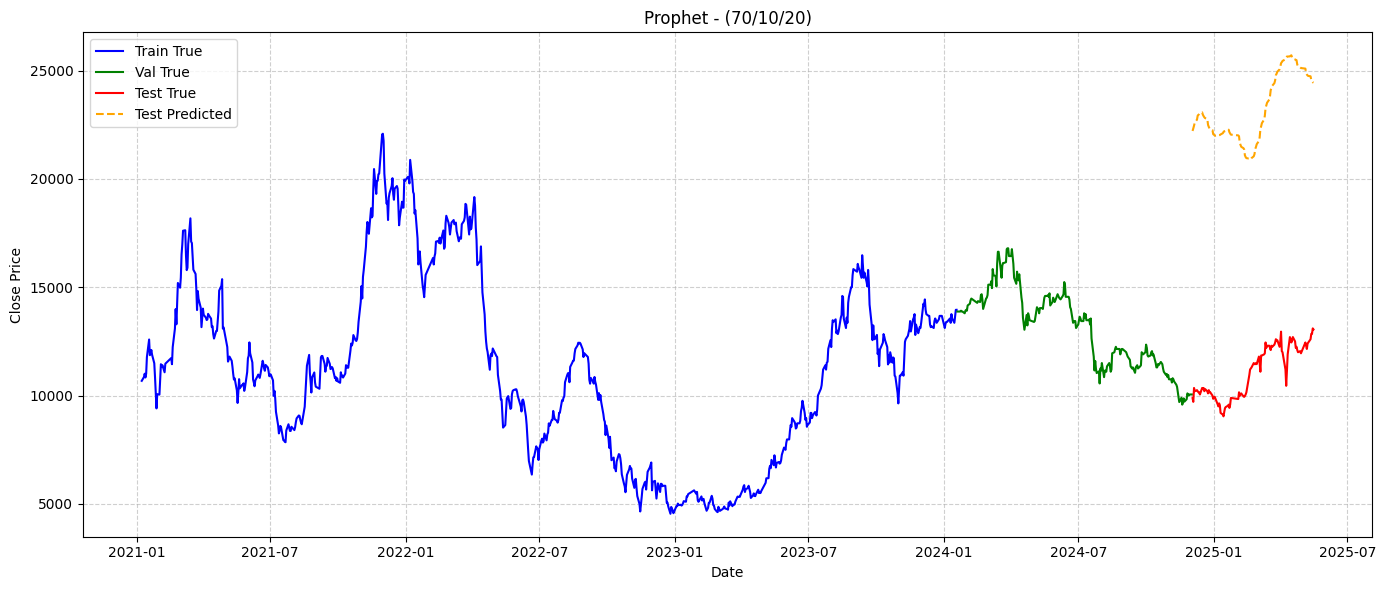

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train_df['ds'], train_df['y'], label='Train True', color='blue')
plt.plot(val_df['ds'], val_df['y'], label='Val True', color='green')
plt.plot(test_df['ds'], test_df['y'], label='Test True', color='red')
plt.plot(test_df['ds'], forecast_test['yhat'], label='Test Predicted', color='orange', linestyle='--')
plt.title('Prophet - (70/10/20)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Prophet 75 10 15 (best)

In [14]:
n = len(df)
train_size = int(n * 0.70)
val_size = int(n * 0.15)
test_size = n - train_size - val_size
train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

In [15]:
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp520jzc22/j7axjpuh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp520jzc22/d1qybs51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46206', 'data', 'file=/tmp/tmp520jzc22/j7axjpuh.json', 'init=/tmp/tmp520jzc22/d1qybs51.json', 'output', 'file=/tmp/tmp520jzc22/prophet_modelkhf5s1mx/prophet_model-20250611093401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:34:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:34:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
future_test = model.make_future_dataframe(periods=len(val_df) + len(test_df), freq='B')
forecast = model.predict(future_test)

# Trích phần tương ứng với tập test
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test_df):].reset_index(drop=True)
test_true = test_df.reset_index(drop=True)

In [17]:
# Tính các chỉ số đánh giá
mae = mean_absolute_error(test_true['y'], forecast_test['yhat'])
mse = mean_squared_error(test_true['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_true['y'] - forecast_test['yhat']) / test_true['y'])) * 100
r2 = r2_score(test_true['y'], forecast_test['yhat'])

# In kết quả
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²:   {r2:.4f}")

MAE:  11240.94
MSE:  128971439.73
RMSE: 11356.56
MAPE: 102.67%
R²:   -111.4602


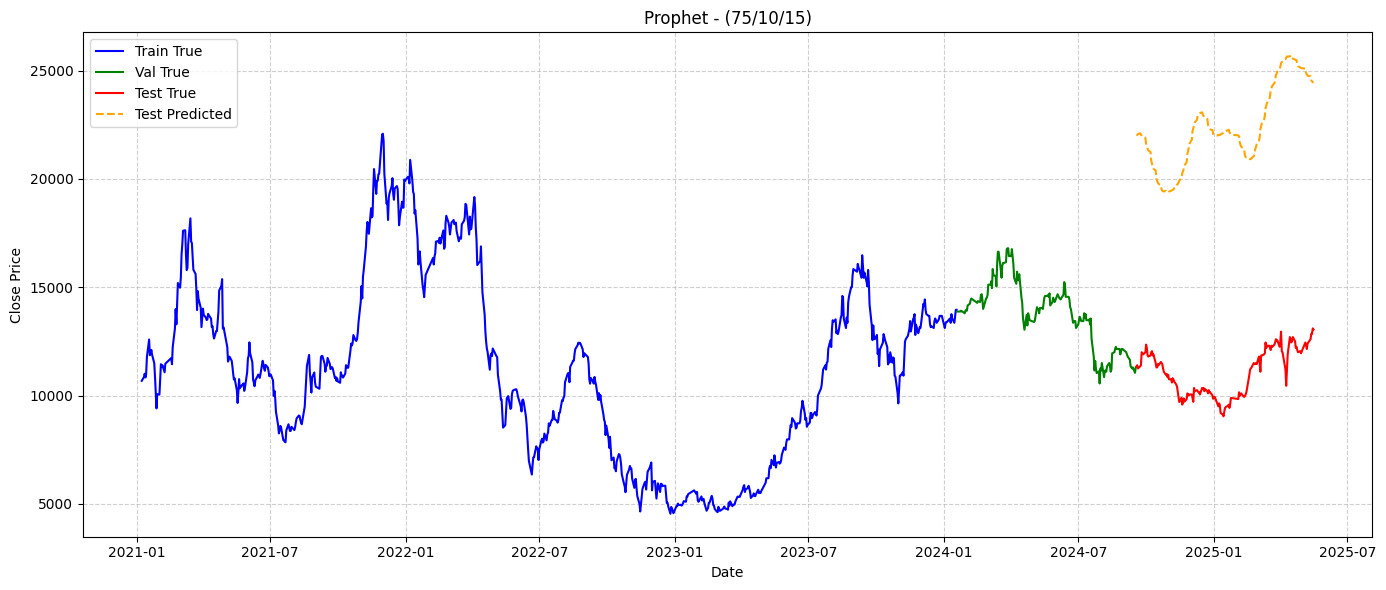

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train_df['ds'], train_df['y'], label='Train True', color='blue')
plt.plot(val_df['ds'], val_df['y'], label='Val True', color='green')
plt.plot(test_df['ds'], test_df['y'], label='Test True', color='red')
plt.plot(test_df['ds'], forecast_test['yhat'], label='Test Predicted', color='orange', linestyle='--')
plt.title('Prophet - (75/10/15)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

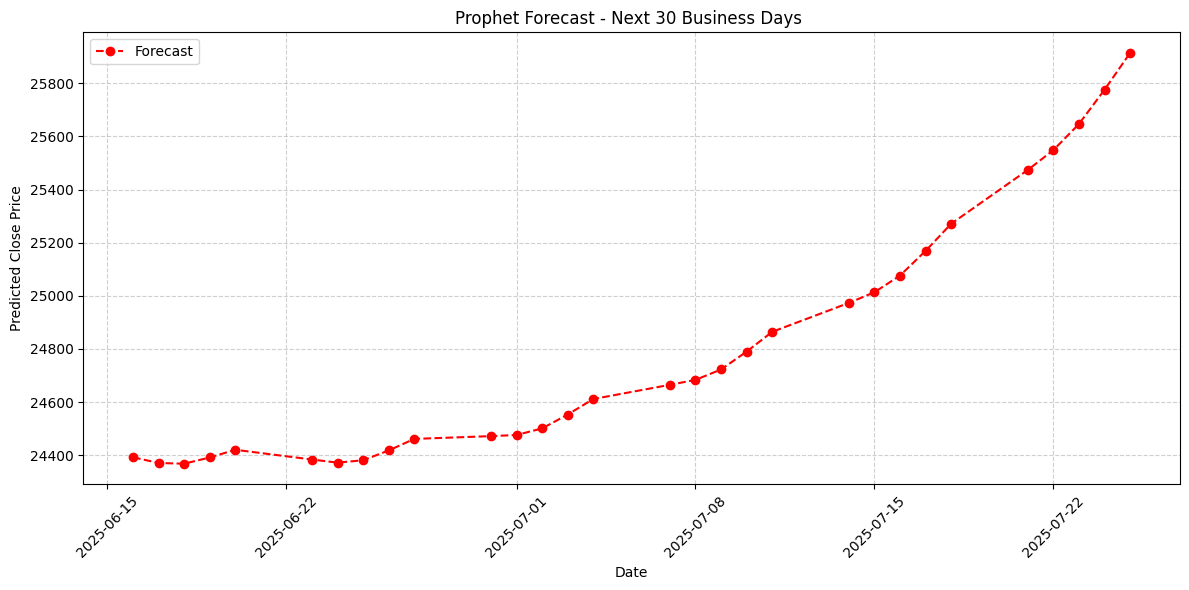

In [19]:
start_date = pd.to_datetime("2025-06-16")
future_dates = pd.date_range(start=start_date, periods=30, freq='B')
future_df = pd.DataFrame({'ds': future_dates})
forecast = model.predict(future_df)
forecast_30 = forecast[['ds', 'yhat']]

# 5. Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.plot(forecast_30['ds'], forecast_30['yhat'], 'ro--', label='Forecast')
plt.title("Prophet Forecast - Next 30 Business Days ")
plt.xlabel("Date")
plt.ylabel("Predicted Close Price")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()